## Timeframe 1

In [1]:
import pandas as pd
df = pd.read_csv("D:\Project Phase II\Dataset\cleaneddataset.csv",encoding='cp1252')
df = df.drop_duplicates()
start_Stime = 1421927443  
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 300))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_5_5_5_4_5_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_5_5_5_4_5_2.add_node(src_node)
    attackG_5_5_5_4_5_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_5_5_5_4_5_2.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonoverallG_5_5_5_4_5_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonoverallG_5_5_5_4_5_2.add_node(src_node)
    nonoverallG_5_5_5_4_5_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonoverallG_5_5_5_4_5_2.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_5_5_5_4_5_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_5_5_5_4_5_1.add_node(src_node)
    overallG_5_5_5_4_5_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_5_5_5_4_5_1.add_edge(src_node, dst_node, weight=edge_weight)

C:\Users\sathi\AppData\Local\Temp\ipykernel_18272\3469851486.py:2: DtypeWarning: Columns (1,3,38,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Project Phase II\Dataset\cleaneddataset.csv",encoding='cp1252')


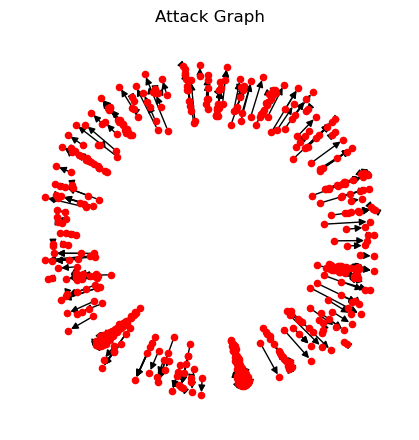

In [4]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(attackG_5_5_5_4_5_2)
nx.draw(attackG_5_5_5_4_5_2, pos, with_labels=False, node_size=20, node_color = "red")
plt.title("Attack Graph")
plt.show()

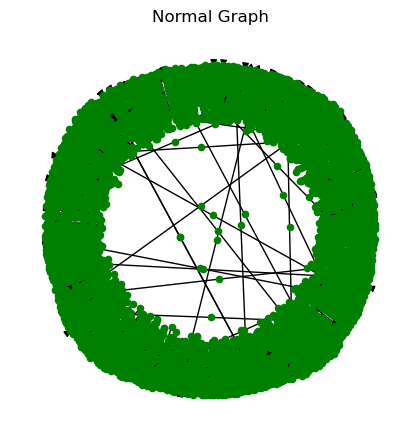

In [5]:
plt.figure(figsize=(4,4))
pos = nx.spring_layout(nonoverallG_5_5_5_4_5_2)
nx.draw(nonoverallG_5_5_5_4_5_2, pos, with_labels=False, node_size=20, node_color='green')
plt.title("Normal Graph")
plt.show()

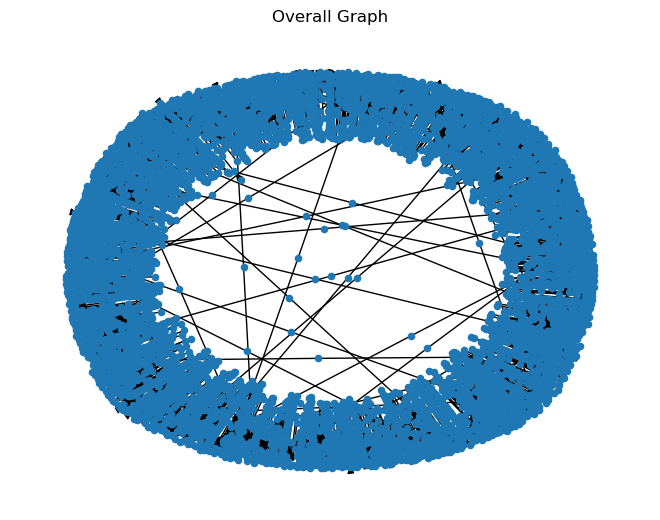

In [7]:
plt.figure(figsize=(4,4))
pos = nx.spring_layout(overallG_5_5_5_4_5_1)
nx.draw(overallG_5_5_5_4_5_1, pos, with_labels=False, node_size=20)
plt.title("Overall Graph")
plt.show()

In [5]:
#find number of nodes and edges in the graph
attack_num_nodes = attackG_5_5_5_4_5_2.number_of_nodes()
attack_num_edges = attackG_5_5_5_4_5_2.number_of_edges()
nonoverall_num_nodes = nonoverallG_5_5_5_4_5_2.number_of_nodes()
nonoverall_num_edges = nonoverallG_5_5_5_4_5_2.number_of_edges()
overall_num_nodes = overallG_5_5_5_4_5_1.number_of_nodes()
overall_num_edges = overallG_5_5_5_4_5_1.number_of_edges()
print("Number of nodes and edges in attack graph: ", attack_num_nodes, attack_num_edges)
print("Number of nodes and edges in non-attack graph: ", nonoverall_num_nodes, nonoverall_num_edges)
print("Number of nodes and edges in overall graph: ", overall_num_nodes, overall_num_edges)

Number of nodes and edges in attack graph:  536 421
Number of nodes and edges in non-attack graph:  9291 7236
Number of nodes and edges in overall graph:  9824 7657


In [11]:
import networkx as nx

# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_5_5_5_4_5_2)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonoverallG_5_5_5_4_5_2)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_5_5_5_4_5_1)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_5_5_5_4_5_2)
avg_clustering_non_attack = nx.average_clustering(nonoverallG_5_5_5_4_5_2)
avg_clustering_overall = nx.average_clustering(overallG_5_5_5_4_5_1)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_5_5_5_4_5_2.degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_degree_overall = sum(dict(overallG_5_5_5_4_5_1.degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
try:
    avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
except:
    avg_eigenvector_attack = None
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_5_5_5_4_5_2.in_degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_in_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.in_degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_in_degree_overall = sum(dict(overallG_5_5_5_4_5_1.in_degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_5_5_5_4_5_2.out_degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_out_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.out_degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_out_degree_overall = sum(dict(overallG_5_5_5_4_5_1.out_degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_pagerank_non_attack = sum(nx.pagerank(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_pagerank_overall = sum(nx.pagerank(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_5_5_5_4_5_2)
avg_shortest_path_non_attack = calculate_diameter(nonoverallG_5_5_5_4_5_2)
avg_shortest_path_overall = calculate_diameter(overallG_5_5_5_4_5_1)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_5_5_5_4_5_2)
density_non_attack = nx.density(nonoverallG_5_5_5_4_5_2)
density_overall = nx.density(overallG_5_5_5_4_5_1)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_5_5_5_4_5_2)
diameter_non_attack = calculate_diameter(nonoverallG_5_5_5_4_5_2)
diameter_overall = calculate_diameter(overallG_5_5_5_4_5_1)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_5_5_5_4_5_2)
num_louvain_non_attack = detect_communities(nonoverallG_5_5_5_4_5_2)
num_louvain_overall = detect_communities(overallG_5_5_5_4_5_1)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_5_5_5_4_5_2)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonoverallG_5_5_5_4_5_2)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_5_5_5_4_5_1)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_5_5_5_4_5_2)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonoverallG_5_5_5_4_5_2)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_5_5_5_4_5_1)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_5_5_5_4_5_2)
reciprocity_non_attack = calculate_reciprocity(nonoverallG_5_5_5_4_5_2)
reciprocity_overall = calculate_reciprocity(overallG_5_5_5_4_5_1)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


Assortativity coefficient for attack graph: nan
Assortativity coefficient for non-attack graph: -0.02030460572360416
Assortativity coefficient for overall graph: -0.016673887835061702
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 2.4944962690610122e-12
Average betweenness centrality for overall graph: 2.1100734257739592e-12
Average closeness centrality for attack graph: 0.001468126656437442
Average closeness centrality for non-attack graph: 8.384079611904631e-05
Average closeness centrality for overall graph: 7.935224787093033e-05
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.5708955223880596
Average degree for non-attack graph: 1.557636422344204
Average degree for overall graph: 1.5588355048859934
Average degree centrality for attack graph: 0.002936253312874898
Average degree

## Timeframe2

In [12]:
start_Stime = 1424219889  
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 300))]
df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_5_5_5_4_5_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_5_5_5_4_5_2.add_node(src_node)
    attackG_5_5_5_4_5_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_5_5_5_4_5_2.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonoverallG_5_5_5_4_5_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonoverallG_5_5_5_4_5_2.add_node(src_node)
    nonoverallG_5_5_5_4_5_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonoverallG_5_5_5_4_5_2.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_5_5_5_4_5_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_5_5_5_4_5_1.add_node(src_node)
    overallG_5_5_5_4_5_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_5_5_5_4_5_1.add_edge(src_node, dst_node, weight=edge_weight)

In [13]:
#find number of nodes and edges in the graph
attack_num_nodes = attackG_5_5_5_4_5_2.number_of_nodes()
attack_num_edges = attackG_5_5_5_4_5_2.number_of_edges()
nonoverall_num_nodes = nonoverallG_5_5_5_4_5_2.number_of_nodes()
nonoverall_num_edges = nonoverallG_5_5_5_4_5_2.number_of_edges()
overall_num_nodes = overallG_5_5_5_4_5_1.number_of_nodes()
overall_num_edges = overallG_5_5_5_4_5_1.number_of_edges()
print("Number of nodes and edges in attack graph: ", attack_num_nodes, attack_num_edges)
print("Number of nodes and edges in non-attack graph: ", nonoverall_num_nodes, nonoverall_num_edges)
print("Number of nodes and edges in overall graph: ", overall_num_nodes, overall_num_edges)

Number of nodes and edges in attack graph:  492 386
Number of nodes and edges in non-attack graph:  10570 8501
Number of nodes and edges in overall graph:  11059 8887


In [14]:
import networkx as nx

# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_5_5_5_4_5_2)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonoverallG_5_5_5_4_5_2)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_5_5_5_4_5_1)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_5_5_5_4_5_2)
avg_clustering_non_attack = nx.average_clustering(nonoverallG_5_5_5_4_5_2)
avg_clustering_overall = nx.average_clustering(overallG_5_5_5_4_5_1)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_5_5_5_4_5_2.degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_degree_overall = sum(dict(overallG_5_5_5_4_5_1.degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
try:
    avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
except:
    avg_eigenvector_attack = None
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_5_5_5_4_5_2.in_degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_in_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.in_degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_in_degree_overall = sum(dict(overallG_5_5_5_4_5_1.in_degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_5_5_5_4_5_2.out_degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_out_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.out_degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_out_degree_overall = sum(dict(overallG_5_5_5_4_5_1.out_degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_pagerank_non_attack = sum(nx.pagerank(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_pagerank_overall = sum(nx.pagerank(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_5_5_5_4_5_2)
avg_shortest_path_non_attack = calculate_diameter(nonoverallG_5_5_5_4_5_2)
avg_shortest_path_overall = calculate_diameter(overallG_5_5_5_4_5_1)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_5_5_5_4_5_2)
density_non_attack = nx.density(nonoverallG_5_5_5_4_5_2)
density_overall = nx.density(overallG_5_5_5_4_5_1)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_5_5_5_4_5_2)
diameter_non_attack = calculate_diameter(nonoverallG_5_5_5_4_5_2)
diameter_overall = calculate_diameter(overallG_5_5_5_4_5_1)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_5_5_5_4_5_2)
num_louvain_non_attack = detect_communities(nonoverallG_5_5_5_4_5_2)
num_louvain_overall = detect_communities(overallG_5_5_5_4_5_1)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_5_5_5_4_5_2)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonoverallG_5_5_5_4_5_2)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_5_5_5_4_5_1)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_5_5_5_4_5_2)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonoverallG_5_5_5_4_5_2)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_5_5_5_4_5_1)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_5_5_5_4_5_2)
reciprocity_non_attack = calculate_reciprocity(nonoverallG_5_5_5_4_5_2)
reciprocity_overall = calculate_reciprocity(overallG_5_5_5_4_5_1)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


Assortativity coefficient for attack graph: inf
Assortativity coefficient for non-attack graph: 0.0029470955629526323
Assortativity coefficient for overall graph: 0.006476953374028746
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 2.5410871785880547e-12
Average betweenness centrality for overall graph: 2.2186638206299405e-12
Average closeness centrality for attack graph: 0.001597867302501947
Average closeness centrality for non-attack graph: 7.610482916560143e-05
Average closeness centrality for overall graph: 7.267944500183823e-05
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.5691056910569106
Average degree for non-attack graph: 1.6085146641438033
Average degree for overall graph: 1.6071977574825933
Average degree centrality for attack graph: 0.003195734605003853
Average degre

## Timeframe 3

In [15]:
start_Stime = 1421927743    
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 300))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_5_5_5_4_5_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_5_5_5_4_5_2.add_node(src_node)
    attackG_5_5_5_4_5_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_5_5_5_4_5_2.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonoverallG_5_5_5_4_5_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonoverallG_5_5_5_4_5_2.add_node(src_node)
    nonoverallG_5_5_5_4_5_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonoverallG_5_5_5_4_5_2.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_5_5_5_4_5_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_5_5_5_4_5_1.add_node(src_node)
    overallG_5_5_5_4_5_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_5_5_5_4_5_1.add_edge(src_node, dst_node, weight=edge_weight)

In [16]:
#find number of nodes and edges in the graph
attack_num_nodes = attackG_5_5_5_4_5_2.number_of_nodes()
attack_num_edges = attackG_5_5_5_4_5_2.number_of_edges()
nonoverall_num_nodes = nonoverallG_5_5_5_4_5_2.number_of_nodes()
nonoverall_num_edges = nonoverallG_5_5_5_4_5_2.number_of_edges()
overall_num_nodes = overallG_5_5_5_4_5_1.number_of_nodes()
overall_num_edges = overallG_5_5_5_4_5_1.number_of_edges()
print("Number of nodes and edges in attack graph: ", attack_num_nodes, attack_num_edges)
print("Number of nodes and edges in non-attack graph: ", nonoverall_num_nodes, nonoverall_num_edges)
print("Number of nodes and edges in overall graph: ", overall_num_nodes, overall_num_edges)

Number of nodes and edges in attack graph:  830 716
Number of nodes and edges in non-attack graph:  8650 6823
Number of nodes and edges in overall graph:  9472 7539


In [17]:
import networkx as nx

# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_5_5_5_4_5_2)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonoverallG_5_5_5_4_5_2)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_5_5_5_4_5_1)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_5_5_5_4_5_2)
avg_clustering_non_attack = nx.average_clustering(nonoverallG_5_5_5_4_5_2)
avg_clustering_overall = nx.average_clustering(overallG_5_5_5_4_5_1)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_5_5_5_4_5_2.degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_degree_overall = sum(dict(overallG_5_5_5_4_5_1.degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_5_5_5_4_5_2.in_degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_in_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.in_degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_in_degree_overall = sum(dict(overallG_5_5_5_4_5_1.in_degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_5_5_5_4_5_2.out_degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_out_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.out_degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_out_degree_overall = sum(dict(overallG_5_5_5_4_5_1.out_degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_pagerank_non_attack = sum(nx.pagerank(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_pagerank_overall = sum(nx.pagerank(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_5_5_5_4_5_2)
avg_shortest_path_non_attack = calculate_diameter(nonoverallG_5_5_5_4_5_2)
avg_shortest_path_overall = calculate_diameter(overallG_5_5_5_4_5_1)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_5_5_5_4_5_2)
density_non_attack = nx.density(nonoverallG_5_5_5_4_5_2)
density_overall = nx.density(overallG_5_5_5_4_5_1)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_5_5_5_4_5_2)
diameter_non_attack = calculate_diameter(nonoverallG_5_5_5_4_5_2)
diameter_overall = calculate_diameter(overallG_5_5_5_4_5_1)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_5_5_5_4_5_2)
num_louvain_non_attack = detect_communities(nonoverallG_5_5_5_4_5_2)
num_louvain_overall = detect_communities(overallG_5_5_5_4_5_1)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_5_5_5_4_5_2)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonoverallG_5_5_5_4_5_2)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_5_5_5_4_5_1)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_5_5_5_4_5_2)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonoverallG_5_5_5_4_5_2)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_5_5_5_4_5_1)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_5_5_5_4_5_2)
reciprocity_non_attack = calculate_reciprocity(nonoverallG_5_5_5_4_5_2)
reciprocity_overall = calculate_reciprocity(overallG_5_5_5_4_5_1)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in sqrt
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


Assortativity coefficient for attack graph: nan
Assortativity coefficient for non-attack graph: -0.004997015997057481
Assortativity coefficient for overall graph: -0.0035658938738395156
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 3.0912370510390632e-12
Average betweenness centrality for overall graph: 2.354195312703567e-12
Average closeness centrality for attack graph: 0.001040591800252878
Average closeness centrality for non-attack graph: 9.120748809657213e-05
Average closeness centrality for overall graph: 8.404460100344221e-05
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.725301204819277
Average degree for non-attack graph: 1.5775722543352602
Average degree for overall graph: 1.591849662162162
Average degree centrality for attack graph: 0.002081183600505783
Average degree

## Timeframe 4

In [18]:
start_Stime = 1424237559    
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 300))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_5_5_5_4_5_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_5_5_5_4_5_2.add_node(src_node)
    attackG_5_5_5_4_5_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_5_5_5_4_5_2.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonoverallG_5_5_5_4_5_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonoverallG_5_5_5_4_5_2.add_node(src_node)
    nonoverallG_5_5_5_4_5_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonoverallG_5_5_5_4_5_2.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_5_5_5_4_5_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_5_5_5_4_5_1.add_node(src_node)
    overallG_5_5_5_4_5_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_5_5_5_4_5_1.add_edge(src_node, dst_node, weight=edge_weight)

In [19]:
#find number of nodes and edges in the graph
attack_num_nodes = attackG_5_5_5_4_5_2.number_of_nodes()
attack_num_edges = attackG_5_5_5_4_5_2.number_of_edges()
nonoverall_num_nodes = nonoverallG_5_5_5_4_5_2.number_of_nodes()
nonoverall_num_edges = nonoverallG_5_5_5_4_5_2.number_of_edges()
overall_num_nodes = overallG_5_5_5_4_5_1.number_of_nodes()
overall_num_edges = overallG_5_5_5_4_5_1.number_of_edges()
print("Number of nodes and edges in attack graph: ", attack_num_nodes, attack_num_edges)
print("Number of nodes and edges in non-attack graph: ", nonoverall_num_nodes, nonoverall_num_edges)
print("Number of nodes and edges in overall graph: ", overall_num_nodes, overall_num_edges)

Number of nodes and edges in attack graph:  483 370
Number of nodes and edges in non-attack graph:  8786 6327
Number of nodes and edges in overall graph:  9264 6697


In [21]:
import networkx as nx

# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_5_5_5_4_5_2)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonoverallG_5_5_5_4_5_2)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_5_5_5_4_5_1)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_5_5_5_4_5_2)
avg_clustering_non_attack = nx.average_clustering(nonoverallG_5_5_5_4_5_2)
avg_clustering_overall = nx.average_clustering(overallG_5_5_5_4_5_1)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_5_5_5_4_5_2.degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_degree_overall = sum(dict(overallG_5_5_5_4_5_1.degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
try:
    avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
except:
    avg_eigenvector_attack = None
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_5_5_5_4_5_2.in_degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_in_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.in_degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_in_degree_overall = sum(dict(overallG_5_5_5_4_5_1.in_degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_5_5_5_4_5_2.out_degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_out_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.out_degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_out_degree_overall = sum(dict(overallG_5_5_5_4_5_1.out_degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_pagerank_non_attack = sum(nx.pagerank(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_pagerank_overall = sum(nx.pagerank(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_5_5_5_4_5_2)
avg_shortest_path_non_attack = calculate_diameter(nonoverallG_5_5_5_4_5_2)
avg_shortest_path_overall = calculate_diameter(overallG_5_5_5_4_5_1)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_5_5_5_4_5_2)
density_non_attack = nx.density(nonoverallG_5_5_5_4_5_2)
density_overall = nx.density(overallG_5_5_5_4_5_1)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_5_5_5_4_5_2)
diameter_non_attack = calculate_diameter(nonoverallG_5_5_5_4_5_2)
diameter_overall = calculate_diameter(overallG_5_5_5_4_5_1)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_5_5_5_4_5_2)
num_louvain_non_attack = detect_communities(nonoverallG_5_5_5_4_5_2)
num_louvain_overall = detect_communities(overallG_5_5_5_4_5_1)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_5_5_5_4_5_2)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonoverallG_5_5_5_4_5_2)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_5_5_5_4_5_1)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_5_5_5_4_5_2)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonoverallG_5_5_5_4_5_2)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_5_5_5_4_5_1)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_5_5_5_4_5_2)
reciprocity_non_attack = calculate_reciprocity(nonoverallG_5_5_5_4_5_2)
reciprocity_overall = calculate_reciprocity(overallG_5_5_5_4_5_1)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


Assortativity coefficient for attack graph: nan
Assortativity coefficient for non-attack graph: 0.0023489550996671237
Assortativity coefficient for overall graph: 0.003614272568533325
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 4.424823610760803e-12
Average betweenness centrality for overall graph: 3.774559429561253e-12
Average closeness centrality for attack graph: 0.0015893061175399246
Average closeness centrality for non-attack graph: 8.198483099243925e-05
Average closeness centrality for overall graph: 7.80539584287774e-05
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.5320910973084887
Average degree for non-attack graph: 1.4402458456635556
Average degree for overall graph: 1.4458117443868739
Average degree centrality for attack graph: 0.0031786122350798453
Average degree

## Timeframe 5

In [22]:
start_Stime = 1424237859      
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 300))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_5_5_5_4_5_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_5_5_5_4_5_2.add_node(src_node)
    attackG_5_5_5_4_5_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_5_5_5_4_5_2.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonoverallG_5_5_5_4_5_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonoverallG_5_5_5_4_5_2.add_node(src_node)
    nonoverallG_5_5_5_4_5_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonoverallG_5_5_5_4_5_2.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_5_5_5_4_5_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_5_5_5_4_5_1.add_node(src_node)
    overallG_5_5_5_4_5_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_5_5_5_4_5_1.add_edge(src_node, dst_node, weight=edge_weight)

In [23]:
#find number of nodes and edges in the graph
attack_num_nodes = attackG_5_5_5_4_5_2.number_of_nodes()
attack_num_edges = attackG_5_5_5_4_5_2.number_of_edges()
nonoverall_num_nodes = nonoverallG_5_5_5_4_5_2.number_of_nodes()
nonoverall_num_edges = nonoverallG_5_5_5_4_5_2.number_of_edges()
overall_num_nodes = overallG_5_5_5_4_5_1.number_of_nodes()
overall_num_edges = overallG_5_5_5_4_5_1.number_of_edges()
print("Number of nodes and edges in attack graph: ", attack_num_nodes, attack_num_edges)
print("Number of nodes and edges in non-attack graph: ", nonoverall_num_nodes, nonoverall_num_edges)
print("Number of nodes and edges in overall graph: ", overall_num_nodes, overall_num_edges)

Number of nodes and edges in attack graph:  575 466
Number of nodes and edges in non-attack graph:  8709 6324
Number of nodes and edges in overall graph:  9277 6790


In [24]:
import networkx as nx

# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_5_5_5_4_5_2)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonoverallG_5_5_5_4_5_2)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_5_5_5_4_5_1)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_5_5_5_4_5_2)
avg_clustering_non_attack = nx.average_clustering(nonoverallG_5_5_5_4_5_2)
avg_clustering_overall = nx.average_clustering(overallG_5_5_5_4_5_1)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_5_5_5_4_5_2.degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_degree_overall = sum(dict(overallG_5_5_5_4_5_1.degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
try:
    avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
except:
    avg_eigenvector_attack = None
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_5_5_5_4_5_2.in_degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_in_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.in_degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_in_degree_overall = sum(dict(overallG_5_5_5_4_5_1.in_degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_5_5_5_4_5_2.out_degree()).values()) / len(attackG_5_5_5_4_5_2)
avg_out_degree_non_attack = sum(dict(nonoverallG_5_5_5_4_5_2.out_degree()).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_out_degree_overall = sum(dict(overallG_5_5_5_4_5_1.out_degree()).values()) / len(overallG_5_5_5_4_5_1)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_5_5_5_4_5_2).values()) / len(attackG_5_5_5_4_5_2)
avg_pagerank_non_attack = sum(nx.pagerank(nonoverallG_5_5_5_4_5_2).values()) / len(nonoverallG_5_5_5_4_5_2)
avg_pagerank_overall = sum(nx.pagerank(overallG_5_5_5_4_5_1).values()) / len(overallG_5_5_5_4_5_1)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_5_5_5_4_5_2)
avg_shortest_path_non_attack = calculate_diameter(nonoverallG_5_5_5_4_5_2)
avg_shortest_path_overall = calculate_diameter(overallG_5_5_5_4_5_1)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_5_5_5_4_5_2)
density_non_attack = nx.density(nonoverallG_5_5_5_4_5_2)
density_overall = nx.density(overallG_5_5_5_4_5_1)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_5_5_5_4_5_2)
diameter_non_attack = calculate_diameter(nonoverallG_5_5_5_4_5_2)
diameter_overall = calculate_diameter(overallG_5_5_5_4_5_1)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_5_5_5_4_5_2)
num_louvain_non_attack = detect_communities(nonoverallG_5_5_5_4_5_2)
num_louvain_overall = detect_communities(overallG_5_5_5_4_5_1)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_5_5_5_4_5_2)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonoverallG_5_5_5_4_5_2)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_5_5_5_4_5_1)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_5_5_5_4_5_2)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonoverallG_5_5_5_4_5_2)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_5_5_5_4_5_1)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_5_5_5_4_5_2)
reciprocity_non_attack = calculate_reciprocity(nonoverallG_5_5_5_4_5_2)
reciprocity_overall = calculate_reciprocity(overallG_5_5_5_4_5_1)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

Assortativity coefficient for attack graph: -0.0634207703650773
Assortativity coefficient for non-attack graph: -0.011179316442620301
Assortativity coefficient for overall graph: -0.014630581244314312
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 4.543243347513035e-12
Average betweenness centrality for overall graph: 1.2529039693874975e-11
Average closeness centrality for attack graph: 0.0014119072867747298
Average closeness centrality for non-attack graph: 8.34014918015019e-05
Average closeness centrality for overall graph: 7.895402809251782e-05
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.6208695652173912
Average degree for non-attack graph: 1.452290733723734
Average degree for overall graph: 1.4638352915813302
Average degree centrality for attack graph: 0.00282381457354950